<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2024notebooks/2024_1011Karapetian_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Karapetian+ (2023), Empirically Identifying and Computationally Modeling the Brain–Behavior Relationship for Human Scene Categorization, Journal of Cognitive Neuroscience 35:11, pp. 1879–1897, doi:10.1162/jocn_a_02043

データは，https://osf.io/4fdky/ より入手して，駒澤 Gdrive で共有

In [1]:
import torch
import IPython
isColab = 'google.colab' in str(IPython.get_ipython())

try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

import numpy as np
import os
import sys
import zipfile
import glob
import PIL
import matplotlib.pyplot as plt

if isColab:
    from google.colab import drive
    drive.mount('/content/drive')

    basedir = '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2023Karapetian_Stimuli'
    fnames = list(sorted(glob.glob(os.path.join(basedir,'*.jpg'))))
else:
    HOME = os.environ['HOME']
    basedir = os.path.join(HOME, 'study/2024Agnessa14_Perceptual-decision-making.git/Stimuli')
    fnames = list(sorted(glob.glob(os.path.join(basedir,'*.jpg'))))

#!ls -lht '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2023Karapetian_Stimuli'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=60d046617b6e1cbc9b1cb7e01539bdf05fd7bd2e67ad9efc8006e13e4885ccfd
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib
Mounted at /content/drive


# 刺激画像の表示

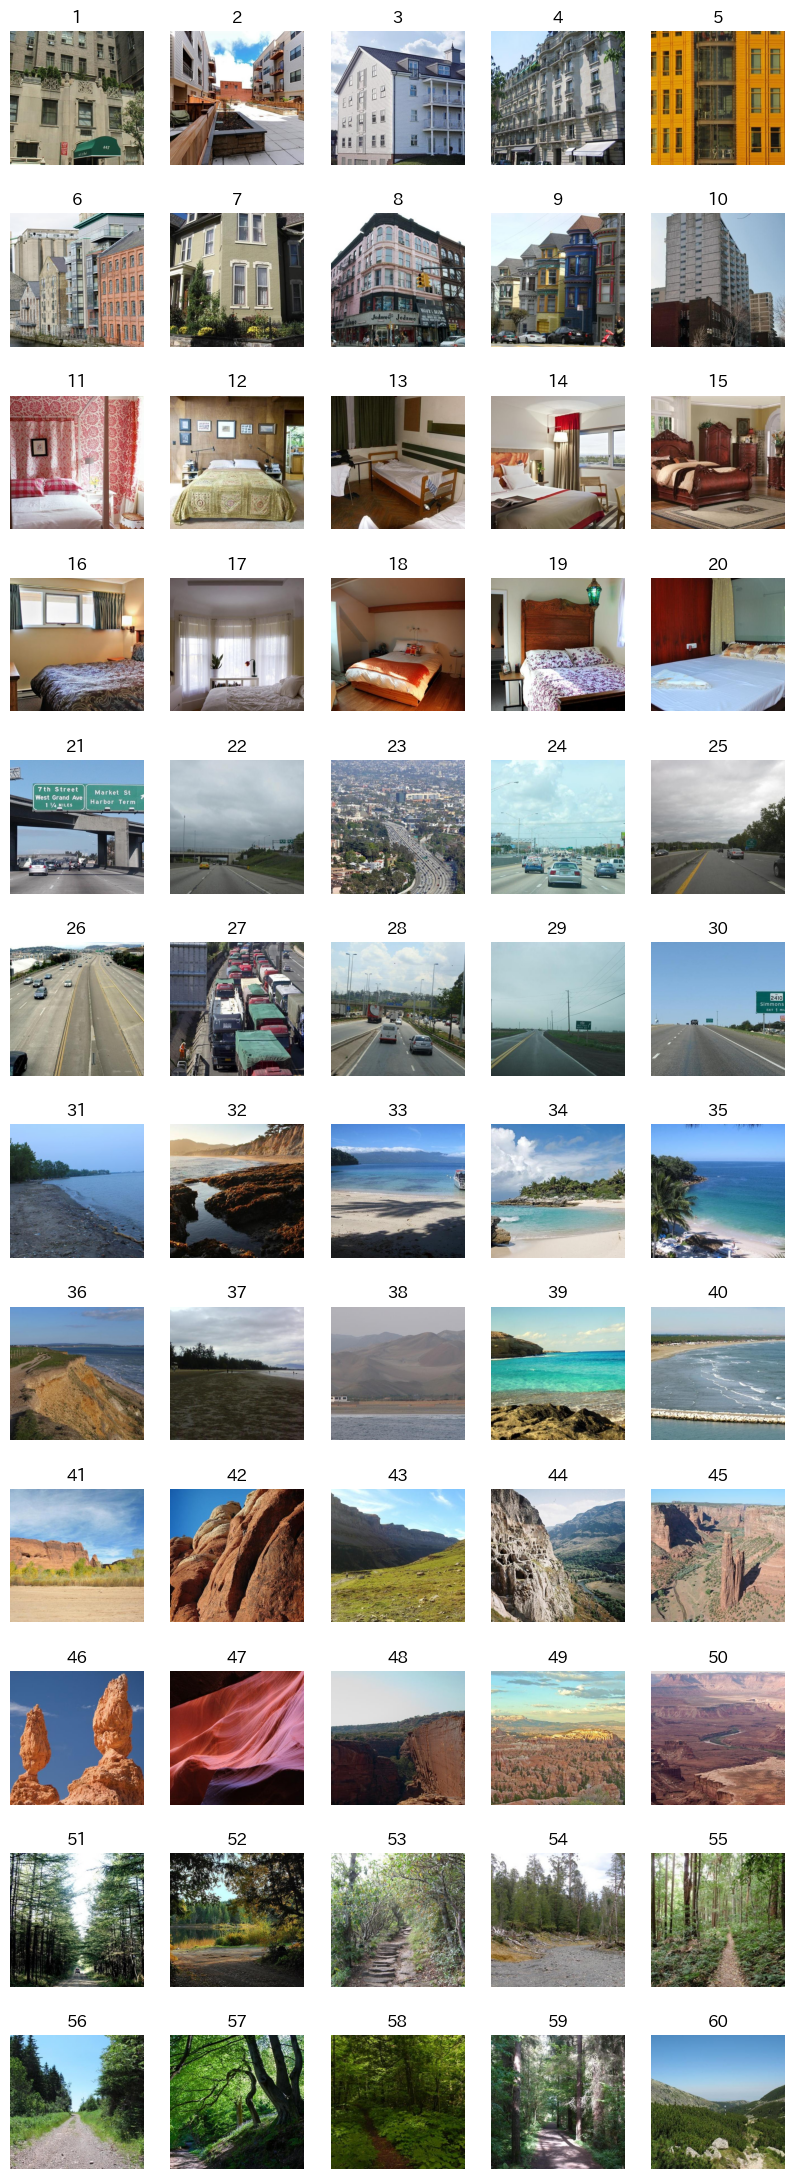

In [2]:
# 刺激画像の表示
nrows, ncols = 12, 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,28))

i=0
for row in range(nrows):
    for col in range(ncols):
        #img = PIL.Image.open(fnames[i]).convert('RGB')
        img = PIL.Image.open(os.path.join(basedir, str(i+1)+'.jpg')).convert('RGB')
        ax[row][col].imshow(img)
        ax[row][col].axis('off')
        ax[row][col].set_title(f'{i+1}')
        i += 1

# 画像を相関係数行列として可視化


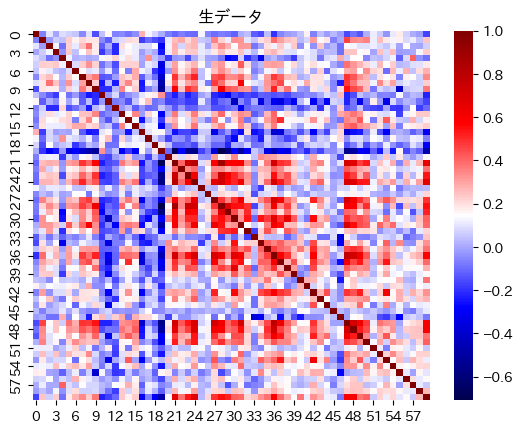

In [3]:
# 画像を相関係数行列として可視化
import seaborn
Imgs = []
for i in range(1,61):
    img = PIL.Image.open(os.path.join(basedir, str(i)+'.jpg'))
    x = np.array(img)
    Imgs.append(x.reshape(-1))

R_img = np.corrcoef(np.array(Imgs))
cmap = 'seismic'
ax = plt.axes()
seaborn.heatmap(R_img, ax=ax, cmap=cmap)
ax.set_title('生データ')
plt.show()
#seaborn.heatmap(R_img, cmap='seismic')

# 深層学習モデルの出力を相関係数行列として可視化


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 69.3MB/s]


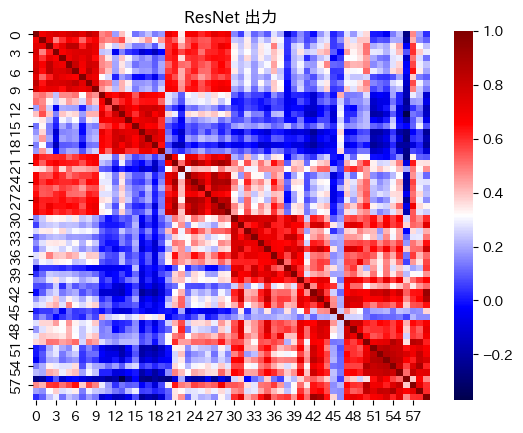

In [4]:
# 深層学習モデルの出力を相関係数行列として可視化
import torchvision.models as models
from torchvision import transforms

Img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

model = models.resnet18(weights="DEFAULT") # .double()

model.eval()
outputs = []
for i in range(1,61):
    img = PIL.Image.open(os.path.join(basedir, str(i)+'.jpg')).convert('RGB')
    _img = Img_transform(img)
    out = model(_img.unsqueeze(0))
    outputs.append(out.detach().numpy()[0])

R_out = np.corrcoef(np.array(outputs))

cmap = 'seismic'
ax = plt.axes()
seaborn.heatmap(R_out, ax=ax, cmap=cmap)
ax.set_title('ResNet 出力')
plt.show()

# 深層モデルの詳細

In [5]:
print(model.eval())
print(f'model.layer4:{model.layer4}')
print(f'model.avgpool:{model.avgpool}')
print(f'model.fc:{model.fc}')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
model = models.resnet18(weights="DEFAULT") # .double()
model = models.resnet50(weights="DEFAULT") # .double()

_avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))
l1_data = []
def get_layer1_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l1_data.append(tmp.reshape(-1))

l2_data = []
def get_layer2_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l2_data.append(tmp.reshape(-1))

l4_data = []
def get_layer4_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l4_data.append(tmp.reshape(-1))

l3_data = []
def get_layer3_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l3_data.append(tmp.reshape(-1))


fc_data = []
def get_fc_output(module, input, output):
    fc_data.append(output.data.detach().cpu().numpy()[0])

#features = ['layer4', 'fc']
model.fc.register_forward_hook(get_fc_output)
model.layer1.register_forward_hook(get_layer1_output)
model.layer2.register_forward_hook(get_layer2_output)
model.layer3.register_forward_hook(get_layer3_output)
model.layer4.register_forward_hook(get_layer4_output)

model.eval()
outputs = []
for i in range(1,61):
    img = PIL.Image.open(os.path.join(basedir, str(i)+'.jpg')).convert('RGB')
    _img = Img_transform(img)
    out = model(_img.unsqueeze(0))
    outputs.append(out.detach().numpy()[0])


print(len(fc_data), np.array(fc_data).shape)
R_L1 = np.corrcoef(np.array(l1_data))
R_L2 = np.corrcoef(np.array(l2_data))
R_L3 = np.corrcoef(np.array(l3_data))
R_L4 = np.corrcoef(np.array(l4_data))
R_fc = np.corrcoef(np.array(fc_data))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 74.0MB/s]


60 (60, 1000)


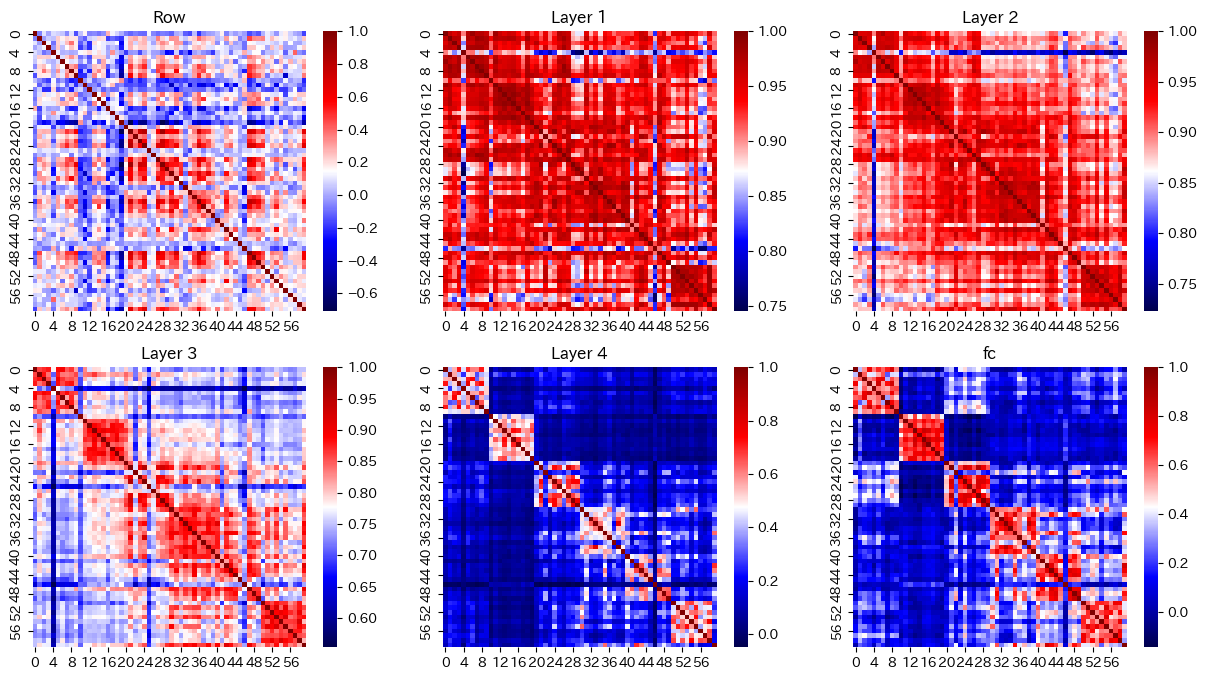

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
i, row, col = 0, 0, 0
for _title, _R in [('Row', R_img), ('Layer 1', R_L1), ('Layer 2', R_L2),
                   ('Layer 3', R_L3), ('Layer 4', R_L4), ('fc', R_fc)]:
    seaborn.heatmap(_R, cmap='seismic', ax=axes[row][col])
    axes[row][col].set_title(_title)

    col += 1
    if col > 2:
        col = 0
        row += 1

plt.show()

In [8]:
import numpy as np
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 教師信号の作成
Tch = np.array([1 for i in range(30)] + [0 for i in range(30)])
models = [KMeans(), LDA(), SVC(), LogReg()]
for model in models:
    print(model.__doc__.split('\n')[:2])
    for D in [Imgs, l1_data, l2_data, l3_data, l4_data]:
        _X, _y = np.array(D), Tch
        _X, _test, _y, _test_y = train_test_split(_X, Tch, test_size=0.2)
        model.fit(_X, _y)
        print(f'予測:{model.predict(_test)}',
              f'正解:{_test_y}')

['K-Means clustering.', '']
予測:[1 3 1 6 2 2 6 4 1 2 2 3] 正解:[1 0 1 0 0 0 1 1 0 0 0 0]
予測:[7 3 1 3 7 3 7 3 1 3 1 3] 正解:[0 1 1 1 0 1 0 1 1 1 1 1]
予測:[1 3 6 2 0 6 6 5 5 1 6 5] 正解:[1 1 1 0 0 1 1 0 0 1 1 0]
予測:[5 5 5 4 4 3 7 7 7 4 7 1] 正解:[1 0 1 1 1 0 1 1 1 1 1 0]
予測:[5 4 5 0 0 0 6 2 5 0 0 6] 正解:[0 1 0 1 1 0 0 1 0 1 1 0]
['Linear Discriminant Analysis.', '']
予測:[0 1 0 1 0 1 1 0 1 1 0 0] 正解:[1 1 1 0 0 1 1 1 1 1 0 0]
予測:[1 0 1 1 1 1 1 1 1 0 0 1] 正解:[1 0 1 1 1 1 1 1 1 0 0 1]
予測:[0 1 0 0 0 1 1 1 1 1 1 1] 正解:[0 1 1 0 0 1 1 1 1 1 1 1]
予測:[0 1 0 0 0 1 1 0 0 1 1 1] 正解:[0 1 1 0 0 1 1 0 0 1 1 1]
予測:[0 1 1 0 0 1 0 1 0 0 1 0] 正解:[0 1 1 0 0 0 0 1 0 1 0 0]
['C-Support Vector Classification.', '']
予測:[1 1 0 1 0 1 1 0 0 1 1 1] 正解:[1 0 0 0 1 1 0 0 0 1 1 0]
予測:[1 1 0 0 1 1 1 0 0 1 0 0] 正解:[1 1 0 1 1 1 1 1 0 1 0 0]
予測:[1 0 0 0 0 0 1 0 1 0 1 1] 正解:[1 0 0 0 0 0 1 0 1 0 1 1]
予測:[0 1 1 1 0 0 1 1 0 1 1 0] 正解:[0 1 1 1 0 0 1 1 0 1 1 0]
予測:[0 1 1 0 1 0 0 0 0 0 0 0] 正解:[0 1 1 0 0 0 0 0 0 0 0 0]
['', '    Logistic Regr

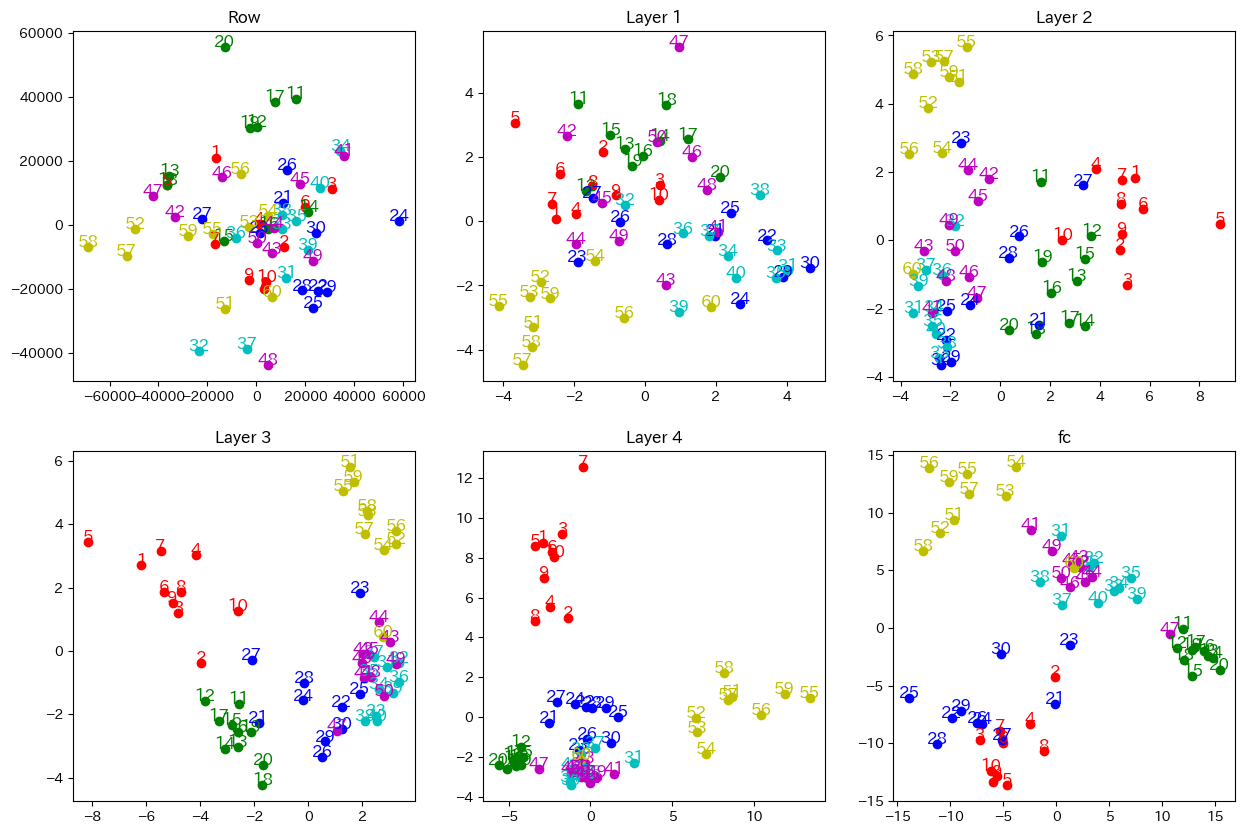

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
colors = ['r','g', 'b', 'c', 'm', 'y']
fontsize=12
i, row, col = 0, 0, 0
for _title, D in [('Row', Imgs), ('Layer 1', l1_data), ('Layer 2', l2_data),
                   ('Layer 3', l3_data), ('Layer 4', l4_data), ('fc', fc_data)]:
    pca = PCA(n_components=2)
    A = pca.fit(np.array(D))
    A2 = pca.transform(D)
    for idx, z in enumerate(A2):
        color = colors[int(idx / 10)]
        axes[row][col].scatter(z[0], z[1], c=color)
        axes[row][col].annotate(str(idx+1), (z[0], z[1]), ha='center', fontsize=fontsize, c=color)
    axes[row][col].set_title(_title)

    col += 1
    if col > 2:
        col = 0
        row += 1


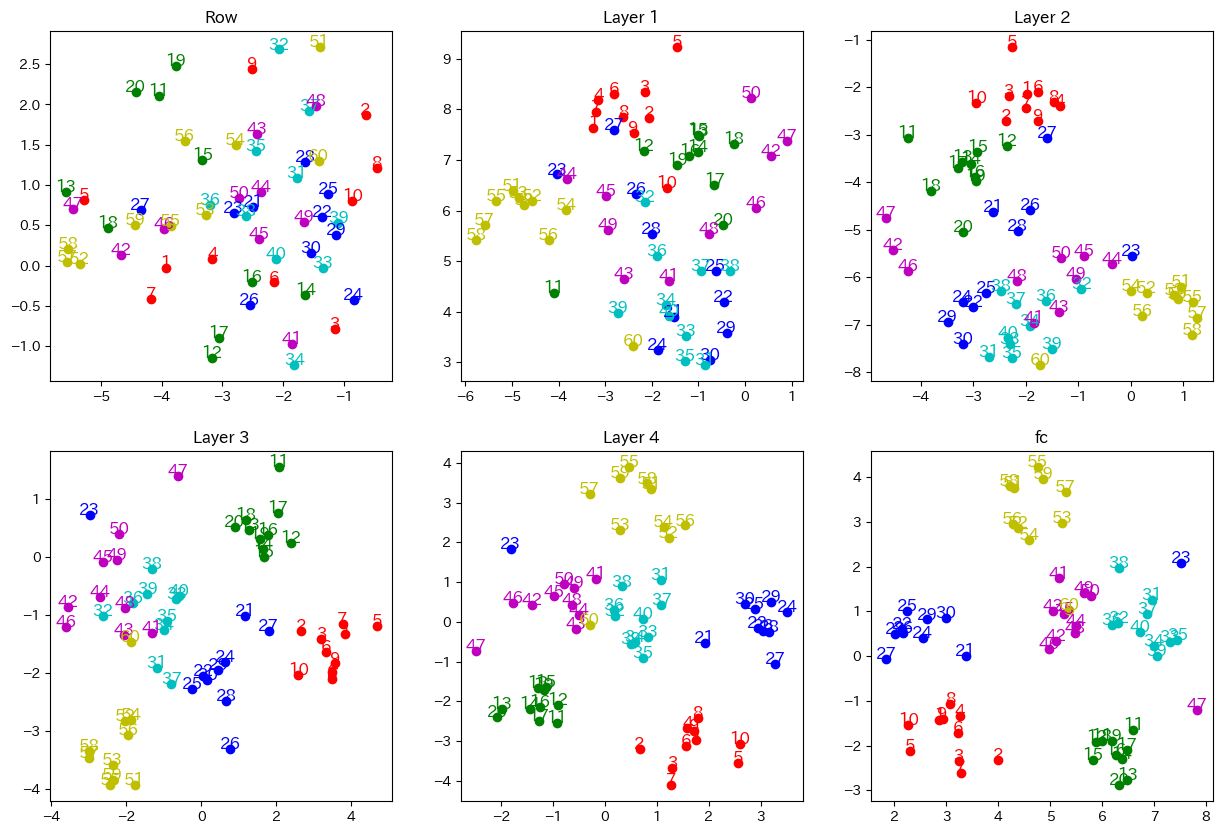

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
colors = ['r','g', 'b', 'c', 'm', 'y']
fontsize=12
row, col = 0, 0
for _title, D in [('Row', Imgs), ('Layer 1', l1_data), ('Layer 2', l2_data),
                   ('Layer 3', l3_data), ('Layer 4', l4_data), ('fc', fc_data)]:

    A2 = TSNE().fit_transform(np.array(D))
    for idx, z in enumerate(A2):
        color = colors[int(idx / 10)]
        axes[row][col].scatter(z[0], z[1], c=color)
        axes[row][col].annotate(str(idx+1), (z[0], z[1]), ha='center', fontsize=fontsize, c=color)
    axes[row][col].set_title(_title)
    col += 1
    if col > 2:
        col = 0
        row += 1


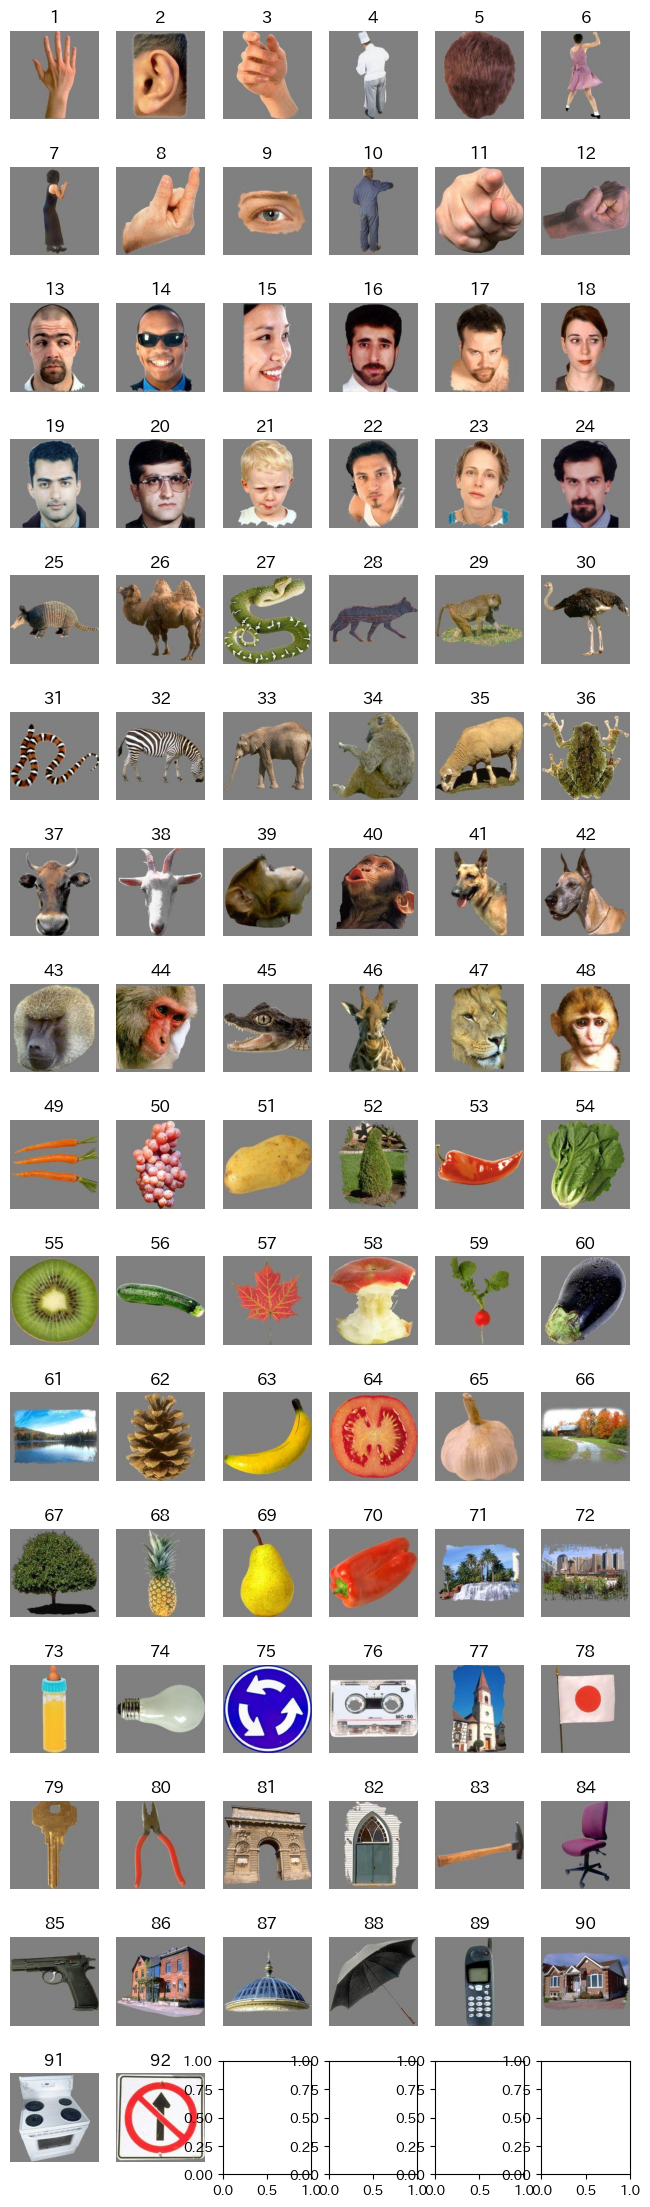

In [12]:
if isColab:
    basedir = '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/cichy_92'
    fnames = list(sorted(glob.glob(os.path.join(basedir,'*.jpg'))))
else:
    HOME = os.environ['HOME']
    fnames = list(sorted(glob.glob(os.path.join(HOME,'study/2024econet/data/input_image_sets/cichy_92/*.jpg'))))
fig, ax = plt.subplots(nrows=16, ncols=6, figsize=(8, 28))
i = 0
Imgs2 = []
for row in range(16):
    for col in range(6):
        img = PIL.Image.open(fnames[i]).convert('RGB')
        Imgs2.append(np.array(img))
        ax[row][col].imshow(img)
        ax[row][col].axis('off')
        ax[row][col].set_title(f'{i+1}')
        i += 1
        if i >= 92:
            break

In [27]:
#!ls "/content/drive/"  # #2024認知心理学研究(1)b/浅川先生/"
!ls -l '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2008Kriegeskorte_figs1.jpg' # 2008Kreigeskorte_fig1s.jpg'
!pwd
!ls -l *.jpg

-rw------- 1 root root 213845 Oct  8 22:54 '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2008Kriegeskorte_figs1.jpg'
/content
-rw------- 1 root root 213845 Oct 10 02:18 2008Kriegeskorte_figs1.jpg


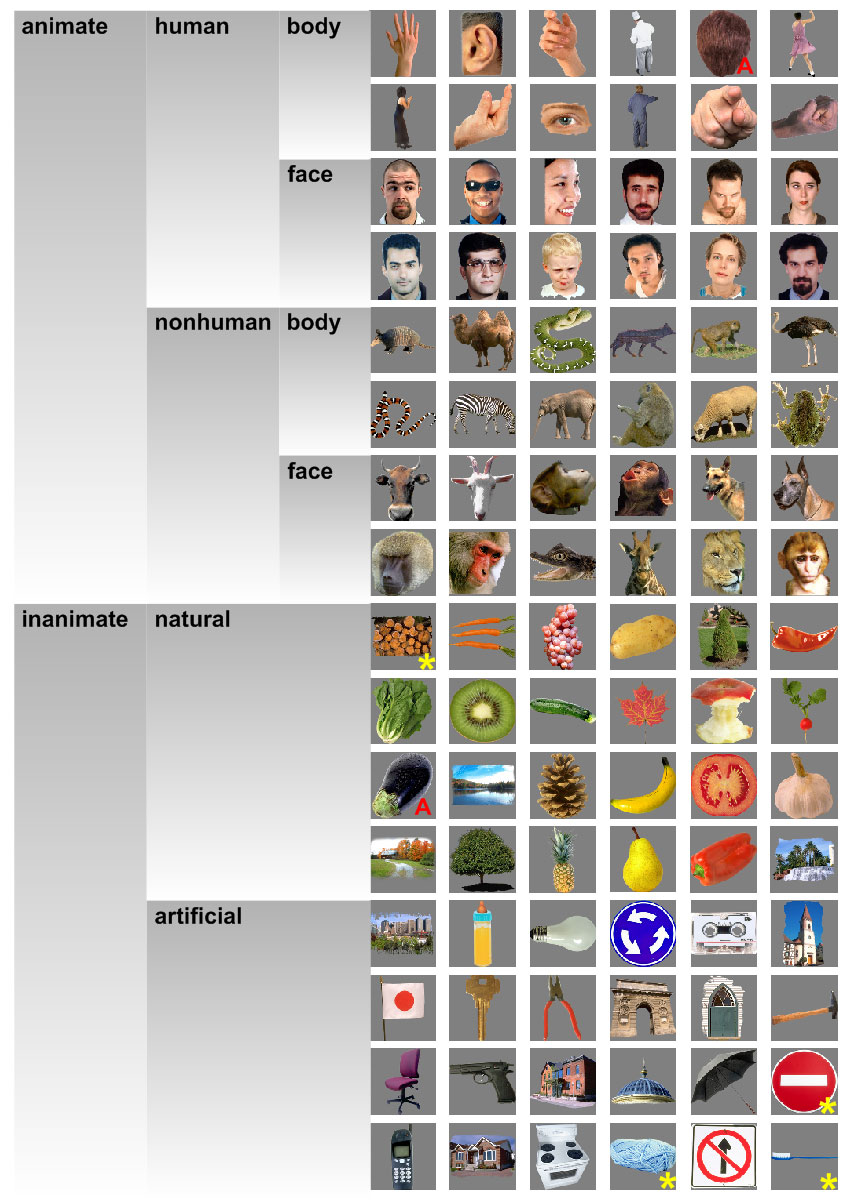

Fig. S1. Stimuli. <br/>
サルと人間に提示された物体画像。
黄色い星印のついた 4 画像は，サル実験のデータが不十分であったため，分析から除外された。
残りの 92 反応が，すべての分析の基礎となる。
被験者のうち数名が，デブリーフィング中に 2 つの刺激を曖昧であると表現した。
これらの 2 つの刺激（ナス，人間の頭の後ろ）は、赤い「A」でマークされている。<br/>

Kriegeskorte+(2008) Matching Categorical Object Representations in Inferior Temporal Cortex of Man and Monkey, DOI 10.1016/j.neuron.2008.10.043

In [28]:
N = np.array(Imgs2).shape[0]
np.array(Imgs2).reshape(N,-1).shape

(92, 91875)

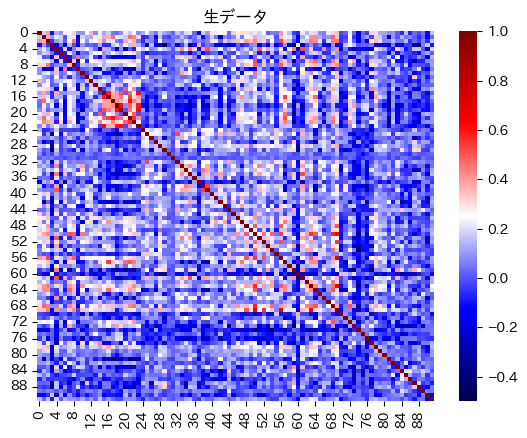

In [29]:
N = np.array(Imgs2).shape[0]
R_img2 = np.corrcoef(np.array(Imgs2).reshape(N,-1))
cmap = 'seismic'
ax = plt.axes()
seaborn.heatmap(R_img2, ax=ax, cmap=cmap)
ax.set_title('生データ')
plt.show()

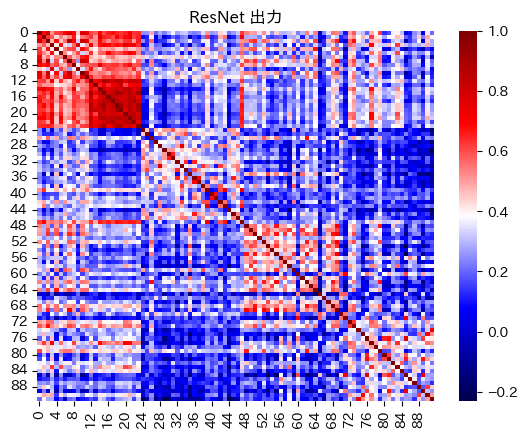

In [30]:
# 深層学習モデルの出力を相関係数行列として可視化
import torchvision.models as models
from torchvision import transforms

Img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

model = models.resnet18(weights="DEFAULT") # .double()

model.eval()
outputs = []
for i in range(92):
    img = PIL.Image.open(fnames[i]).convert('RGB')
    _img = Img_transform(img)
    out = model(_img.unsqueeze(0))
    outputs.append(out.detach().numpy()[0])

R_out = np.corrcoef(np.array(outputs))

cmap = 'seismic'
ax = plt.axes()
seaborn.heatmap(R_out, ax=ax, cmap=cmap)
ax.set_title('ResNet 出力')
plt.show()

In [31]:
model = models.resnet18(weights="DEFAULT") # .double()
model = models.resnet50(weights="DEFAULT") # .double()

_avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))
l1_data = []
def get_layer1_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l1_data.append(tmp.reshape(-1))

l2_data = []
def get_layer2_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l2_data.append(tmp.reshape(-1))

l4_data = []
def get_layer4_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l4_data.append(tmp.reshape(-1))

l3_data = []
def get_layer3_output(module, input, output):
    tmp = _avgpool(output.data)
    tmp = tmp.detach().cpu().numpy()
    l3_data.append(tmp.reshape(-1))


fc_data = []
def get_fc_output(module, input, output):
    fc_data.append(output.data.detach().cpu().numpy()[0])

model.fc.register_forward_hook(get_fc_output)
model.layer1.register_forward_hook(get_layer1_output)
model.layer2.register_forward_hook(get_layer2_output)
model.layer3.register_forward_hook(get_layer3_output)
model.layer4.register_forward_hook(get_layer4_output)

model.eval()
outputs = []
for i in range(len(fnames)):
    img = PIL.Image.open(fnames[i]).convert('RGB')
    _img = Img_transform(img)
    out = model(_img.unsqueeze(0))
    outputs.append(out.detach().numpy()[0])


print(len(fc_data), np.array(fc_data).shape)
R_L1 = np.corrcoef(np.array(l1_data))
R_L2 = np.corrcoef(np.array(l2_data))
R_L3 = np.corrcoef(np.array(l3_data))
R_L4 = np.corrcoef(np.array(l4_data))
R_fc = np.corrcoef(np.array(fc_data))

92 (92, 1000)


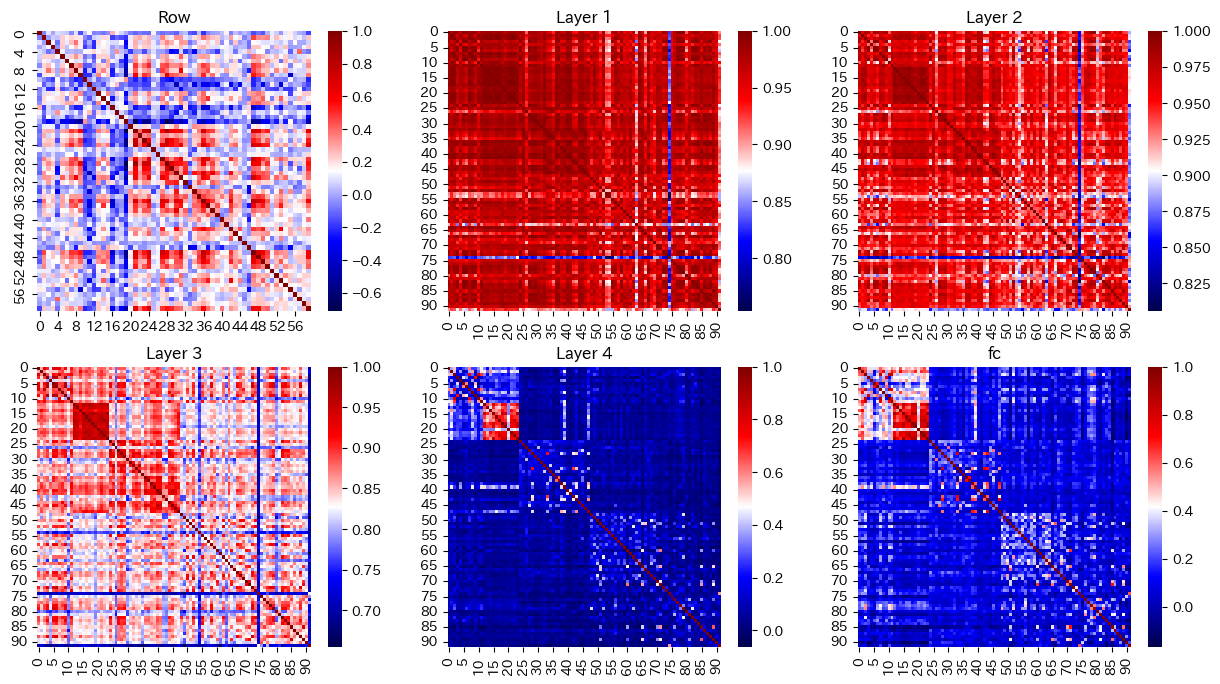

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
i, row, col = 0, 0, 0
for _title, _R in [('Row', R_img), ('Layer 1', R_L1), ('Layer 2', R_L2),
                   ('Layer 3', R_L3), ('Layer 4', R_L4), ('fc', R_fc)]:
    seaborn.heatmap(_R, cmap='seismic', ax=axes[row][col])
    axes[row][col].set_title(_title)

    col += 1
    if col > 2:
        col = 0
        row += 1

plt.show()

In [33]:
import numpy as np
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 教師信号の作成
# Tch = np.array([1 for i in range(24)]
#                + [2 for i in range(24)]
#                + [3 for i in range(24)]
#                + [4 for i in range(20)])
Tch = np.array([0 for i in range(48)] + [1 for i in range(44)])

#models = [SVC(), LogReg()]
models = [KMeans(), LDA(), SVC(), LogReg()]
for model in models:
    print(model.__doc__.split('\n')[:2])
    for D in [Imgs2, l1_data, l2_data, l3_data, l4_data]:
        _X, _y = np.array(D).reshape(92,-1), Tch
        _X, _test, _y, _test_y = train_test_split(_X, Tch, test_size=0.2)
        model.fit(_X, _y)
        print(f'予測:{model.predict(_test)}',
              f'正解:{_test_y}')

['K-Means clustering.', '']
予測:[6 6 6 6 6 6 6 3 6 6 1 4 4 6 4 6 4 6 6] 正解:[1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0]
予測:[5 2 1 2 4 1 0 2 2 7 5 5 2 6 1 5 0 2 2] 正解:[0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0]
予測:[7 5 3 4 5 6 2 2 4 3 4 3 3 6 6 5 4 5 6] 正解:[1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0]
予測:[6 3 6 7 6 6 5 0 6 0 3 2 7 0 3 3 5 7 6] 正解:[1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1]
予測:[4 4 1 4 2 4 3 4 4 4 3 7 0 3 7 3 2 4 3] 正解:[1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1]
['Linear Discriminant Analysis.', '']
予測:[1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0] 正解:[1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1]
予測:[0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1] 正解:[0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1]
予測:[0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0] 正解:[1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0]
予測:[1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0] 正解:[1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0]
予測:[1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1] 正解:[1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1]
['C-Support Vector Classification.', '']
予測:[0 0 0 1 0 0 1 0 0 0 0 1 0 0 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
